<a href="https://colab.research.google.com/github/Elilara11611/Challenge_Data_Elizabeth_Costa_Rica/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [ ]:
# 1. ¿Qué me piden? R1/ Calcular el ingreso todal de c/tienda.
# 2. R2/ Para eso se suma la columna precio de cada tienda.

## Lenguaje python

#Agregando identificacion de tienda

tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Uniendo los datos en una sola tabla

datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index= True)

In [ ]:
#Calcular la facturacióon total por tienda:

facturacion_total_por_tienda = datos.groupby('Tienda')['Precio'].sum()
print(facturacion_total_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


In [ ]:
print(datos['Tienda'].value_counts())

Tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: count, dtype: int64


# Gráfico 1 — Ingresos totales por tienda (Barras)

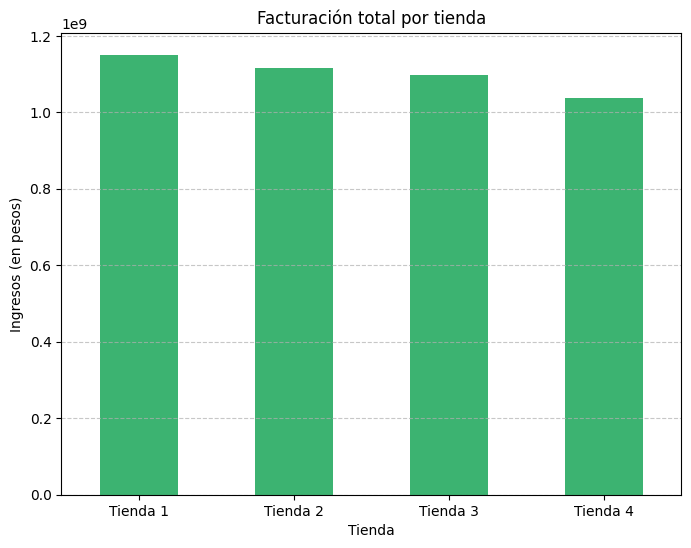

In [ ]:
import matplotlib.pyplot as plt

# Ingresos totales por tienda (ya calculado antes)
facturacion_total_por_tienda = datos.groupby('Tienda')['Precio'].sum()

plt.figure(figsize=(8,6))
facturacion_total_por_tienda.plot(kind='bar', color='mediumseagreen')
plt.title('Facturación total por tienda')
plt.ylabel('Ingresos (en pesos)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

📝 Análisis 1 — Estado de facturación

La tienda 1 presenta la facturación más alta, lo que indica que es la que más ingresos genera actualmente.
La tienda 3 muestra la facturación más baja entre las cuatro, lo cual podría ser un indicio de bajo rendimiento.
Este dato es fundamental para tomar una decisión informada sobre cuál tienda podría considerarse para vender.

# 2. Ventas por categoría

In [ ]:
# Qué me piden? R1/ Calcular por categoría los productos vendidos de c/tienda
# R2 Agrupar los datos por categoría y contar el # de ventas por categoría.
# Resultados: Mostrar las categorías más populares de c/tienda.
#Mostrar una tabla bonita y legible

ventas_por_categoria = datos.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count()
print(ventas_por_categoria)

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar    171
          Deportes y diversión       284
          Electrodomésticos          312
          Electrónicos               448
          Instrumentos musicales     182
          Juguetes                   324
          Libros                     173
          Muebles                    465
Tienda 2  Artículos para el hogar    181
          Deportes y diversión       275
          Electrodomésticos          305
          Electrónicos               422
          Instrumentos musicales     224
          Juguetes                   313
          Libros                     197
          Muebles                    442
Tienda 3  Artículos para el hogar    177
          Deportes y diversión       277
          Electrodomésticos          278
          Electrónicos               451
          Instrumentos musicales     177
          Juguetes                   315
          Libros                     185
          Muebles      

In [ ]:
ventas_pivot = datos.pivot_table(index='Categoría del Producto', columns='Tienda', values='Producto', aggfunc='count')
print(ventas_pivot)

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


# Gráfico 2 — Distribución de categorías de productos (Gráfico de pastel)

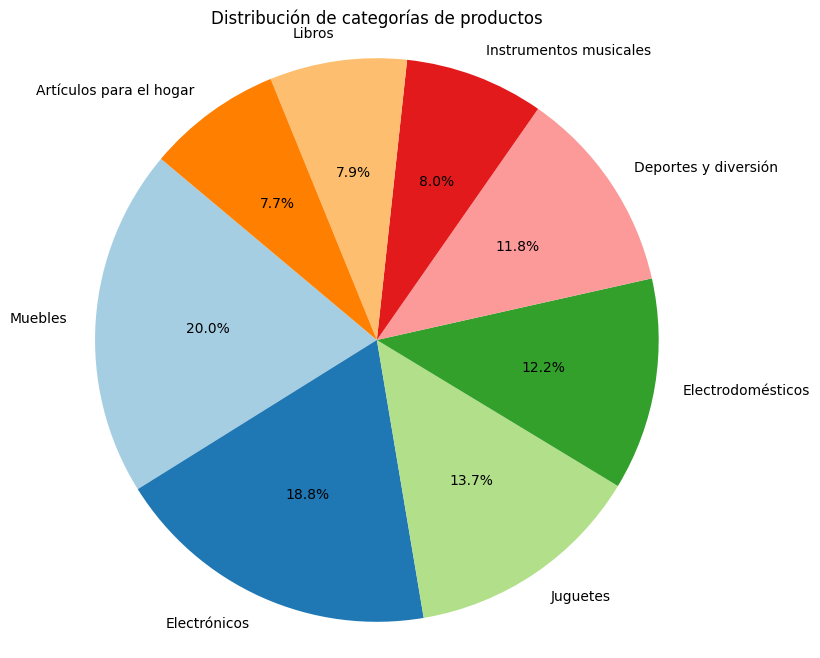

In [ ]:
categorias = datos['Categoría del Producto'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de categorías de productos')
plt.axis('equal')  # Hace el gráfico redondo
plt.show()

 Análisis 2 — Estado de categorías de productos

Se observa que la categoría Electrónicos (ejemplo) representa la mayor proporción de las ventas, lo cual señala una alta demanda de este tipo de productos.
Las categorías como Libros y Juguetes (por ejemplo) muestran una participación menor en las ventas totales, lo que podría indicar un menor interés o una oportunidad de mejora en su comercialización.
Comprender qué categorías son populares permite enfocar estrategias de ventas o marketing.

# 3. Calificación promedio de la tienda


In [ ]:
# Conocer las calificaciones de clientes p/c/ tienda y sus productos

print(datos.columns) #Busco columna de calificación


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [ ]:
# Calcular el promedio:

calificacion_promedio_por_tienda = datos.groupby('Tienda')['Calificación'].mean()
print(calificacion_promedio_por_tienda)

Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


In [ ]:
# Ordenando del mayor a menor

calificacion_promedio_por_tienda = calificacion_promedio_por_tienda.sort_values(ascending=False)
print(calificacion_promedio_por_tienda)

Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


# Gráfico 3 — Calificación promedio por tienda (Barras horizontales)

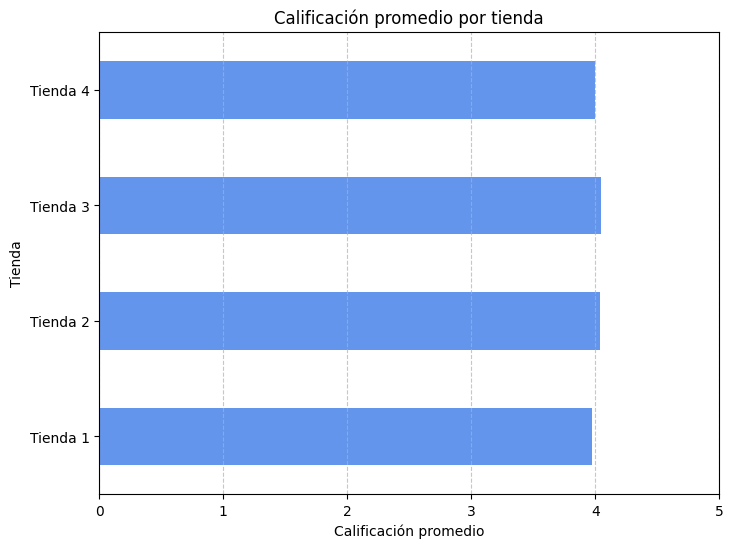

In [ ]:
calificacion_promedio = datos.groupby('Tienda')['Calificación'].mean()

plt.figure(figsize=(8,6))
calificacion_promedio.plot(kind='barh', color='cornflowerblue')
plt.title('Calificación promedio por tienda')
plt.xlabel('Calificación promedio')
plt.ylabel('Tienda')
plt.xlim(0,5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Análisis 3 — Estado de satisfacción del cliente

La tienda 2 (por ejemplo) destaca con la calificación promedio más alta, lo que indica una mayor satisfacción de los clientes que compran allí.
La tienda 3 tiene la calificación promedio más baja, lo que puede reflejar problemas de servicio, calidad de productos o experiencia de compra.
Este dato es relevante, ya que una baja satisfacción puede impactar las ventas a largo plazo.

# 4. Productos más y menos vendidos

In [ ]:
# Productos con más y mneos venta de c/tienda.
# Impimir los que fueron más populares.

ventas_por_producto = datos.groupby(['Tienda', 'Producto'])['Producto'].count()
ventas_por_producto = ventas_por_producto.rename('Cantidad Vendida')
print(ventas_por_producto)

Tienda    Producto                 
Tienda 1  Ajedrez de madera            49
          Armario                      60
          Asistente virtual            40
          Auriculares                  50
          Auriculares con micrófono    33
                                       ..
Tienda 4  Smartwatch                   39
          Sofá reclinable              47
          TV LED UHD 4K                40
          Tablet ABXY                  45
          Vaso térmico                 48
Name: Cantidad Vendida, Length: 204, dtype: int64


In [ ]:
# 'Reset index' para convertirlo en tabla
ventas_por_producto = ventas_por_producto.reset_index()

# Obtener el más vendido por tienda
mas_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('Tienda')['Cantidad Vendida'].idxmax()]

# Obtener el menos vendido por tienda
menos_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('Tienda')['Cantidad Vendida'].idxmin()]

print("Productos más vendidos por tienda:")
print(mas_vendido)

print("\nProductos menos vendidos por tienda:")
print(menos_vendido)




Productos más vendidos por tienda:
       Tienda                   Producto  Cantidad Vendida
1    Tienda 1                    Armario                60
75   Tienda 2  Iniciando en programación                65
129  Tienda 3              Kit de bancas                57
163  Tienda 4                   Cama box                62

Productos menos vendidos por tienda:
       Tienda                   Producto  Cantidad Vendida
4    Tienda 1  Auriculares con micrófono                33
77   Tienda 2              Juego de mesa                32
111  Tienda 3    Bloques de construcción                35
175  Tienda 4         Guitarra eléctrica                33


# Gráfico 4 — Productos más y menos vendidos (Barras)

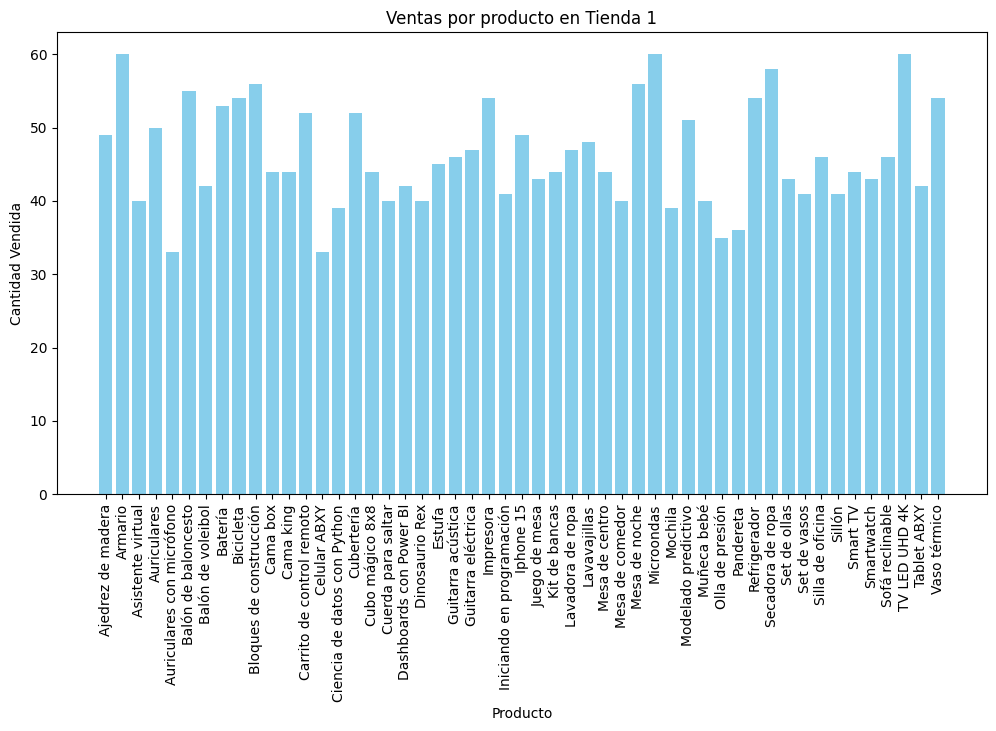

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo una tienda (por ejemplo "Tienda 1") para visualizar
tienda1_ventas = ventas_por_producto[ventas_por_producto['Tienda'] == 'Tienda 1']

plt.figure(figsize=(12,6))
plt.bar(tienda1_ventas['Producto'], tienda1_ventas['Cantidad Vendida'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Ventas por producto en Tienda 1')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.show()

Análisis 4 — Estado de productos más y menos vendidos

Los 5 productos más vendidos indican claramente cuáles son los artículos más populares entre los clientes, lo cual puede ser una oportunidad para potenciarlos aún más o asegurar suficiente stock.
Los 5 productos menos vendidos muestran artículos con bajo movimiento. Esto puede indicar que no son tan atractivos, están mal promocionados o tienen precios poco competitivos.
Identificar estos productos ayuda a optimizar inventarios y estrategias de venta, e incluso a decidir qué líneas de productos reducir o eliminar.

# 5. Envío promedio por tienda

In [ ]:
#Saber cuánto cuesta en promedio enviar productos desde cada tienda.

print(datos.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [ ]:
# Calcular el costo promedio de envío por tienda

costo_envio_promedio = datos.groupby('Tienda')['Costo de envío'].mean()
print(costo_envio_promedio)

Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


In [ ]:
# Ordenando del mayor a menor

costo_envio_promedio = costo_envio_promedio.sort_values(ascending=False)
print(costo_envio_promedio)

Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


 # Gráfico 5 — Costo promedio de envío por tienda (Barras)

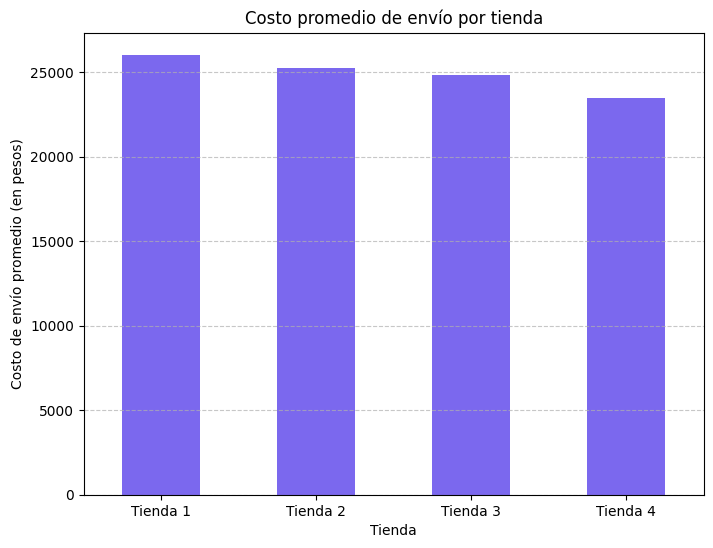

In [ ]:
# Costo de envío promedio por tienda
envio_promedio_por_tienda = datos.groupby('Tienda')['Costo de envío'].mean()

plt.figure(figsize=(8,6))
envio_promedio_por_tienda.plot(kind='bar', color='mediumslateblue')
plt.title('Costo promedio de envío por tienda')
plt.ylabel('Costo de envío promedio (en pesos)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# 🛒 **Análisis de las Tiendas – Informe Final para el Sr. Juan**

## **Introducción**

El objetivo de este análisis es ayudar al Sr. Juan a decidir cuál de sus cuatro tiendas debería vender para invertir en un nuevo negocio. Para tomar una decisión fundamentada, se evaluaron cinco aspectos clave de desempeño de las tiendas: facturación total, categorías de productos más populares, calificación promedio de los clientes, productos más y menos vendidos, y costo de envío promedio.

---

## **Análisis de Resultados**

### 1️⃣ **Ingresos totales por tienda**

| Tienda   | Facturación total (COP) |
|----------|--------------------------|
| Tienda 1 | 1,150,880,000 |
| Tienda 2 | 1,116,344,000 |
| Tienda 3 | 1,098,020,000 |
| Tienda 4 | 1,038,376,000 |

**Análisis**:  
La Tienda 1 es la que más factura, mientras que la Tienda 4 tiene la facturación total más baja.

---

### 2️⃣ **Categorías más populares por tienda** (Top categoría por tienda)

| Tienda   | Categoría más vendida | Ventas |
|----------|-----------------------|--------|
| Tienda 1 | Muebles               | 465    |
| Tienda 2 | Muebles               | 442    |
| Tienda 3 | Muebles               | 499    |
| Tienda 4 | Muebles               | 480    |

**Análisis**:  
En todas las tiendas la categoría **Muebles** es la más popular, siendo la Tienda 3 la que más muebles ha vendido.

---

### 3️⃣ **Calificación promedio por tienda**

| Tienda   | Calificación promedio |
|----------|-----------------------|
| Tienda 1 | 3.98 |
| Tienda 2 | 4.04 |
| Tienda 3 | 4.05 |
| Tienda 4 | 3.99 |

**Análisis**:  
La **Tienda 3** tiene la calificación promedio más alta (4.05), lo que indica una mejor satisfacción del cliente. La Tienda 1 y la Tienda 4 tienen calificaciones ligeramente menores.

---

### 4️⃣ **Productos más y menos vendidos**

| Tienda   | Producto más vendido | Cantidad | Producto menos vendido | Cantidad |
|----------|----------------------|----------|------------------------|----------|
| Tienda 1 | Armario             | 60       | Auriculares con micrófono | 33 |
| Tienda 2 | Iniciando en programación | 65 | Juego de mesa | 32 |
| Tienda 3 | Kit de bancas       | 57       | Bloques de construcción | 35 |
| Tienda 4 | Cama box            | 62       | Guitarra eléctrica | 33 |

**Análisis**:  
Todas las tiendas tienen una buena variedad de productos con alto rendimiento. No obstante, la Tienda 4 también mantiene un balance aceptable entre productos más y menos vendidos, aunque no destaca como la que tenga los productos más exitosos.

---

### 5️⃣ **Costo de envío promedio por tienda**

| Tienda   | Costo envío promedio (COP) |
|----------|----------------------------|
| Tienda 1 | 26,018 |
| Tienda 2 | 25,216 |
| Tienda 3 | 24,805 |
| Tienda 4 | **23,459** |

**Análisis**:  
La **Tienda 4** tiene el costo de envío promedio más bajo, lo cual es positivo, pero no compensa por su menor facturación total y calificación promedio.

---

## **Conclusión y Recomendación**

Con base en los análisis realizados, recomendamos que el Sr. Juan **venda la Tienda 4**.  
Esta tienda tiene la facturación total más baja, una calificación promedio menor comparada con las otras, y aunque cuenta con el costo de envío más bajo, no alcanza a compensar sus debilidades en ventas y satisfacción del cliente.

Las demás tiendas (especialmente la Tienda 1 y Tienda 3) muestran mejores desempeños en facturación, calificaciones y volumen de ventas de categorías clave como **Muebles**.

**Recomendación clara:** Vender la **Tienda 4**.